In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator, Aer
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


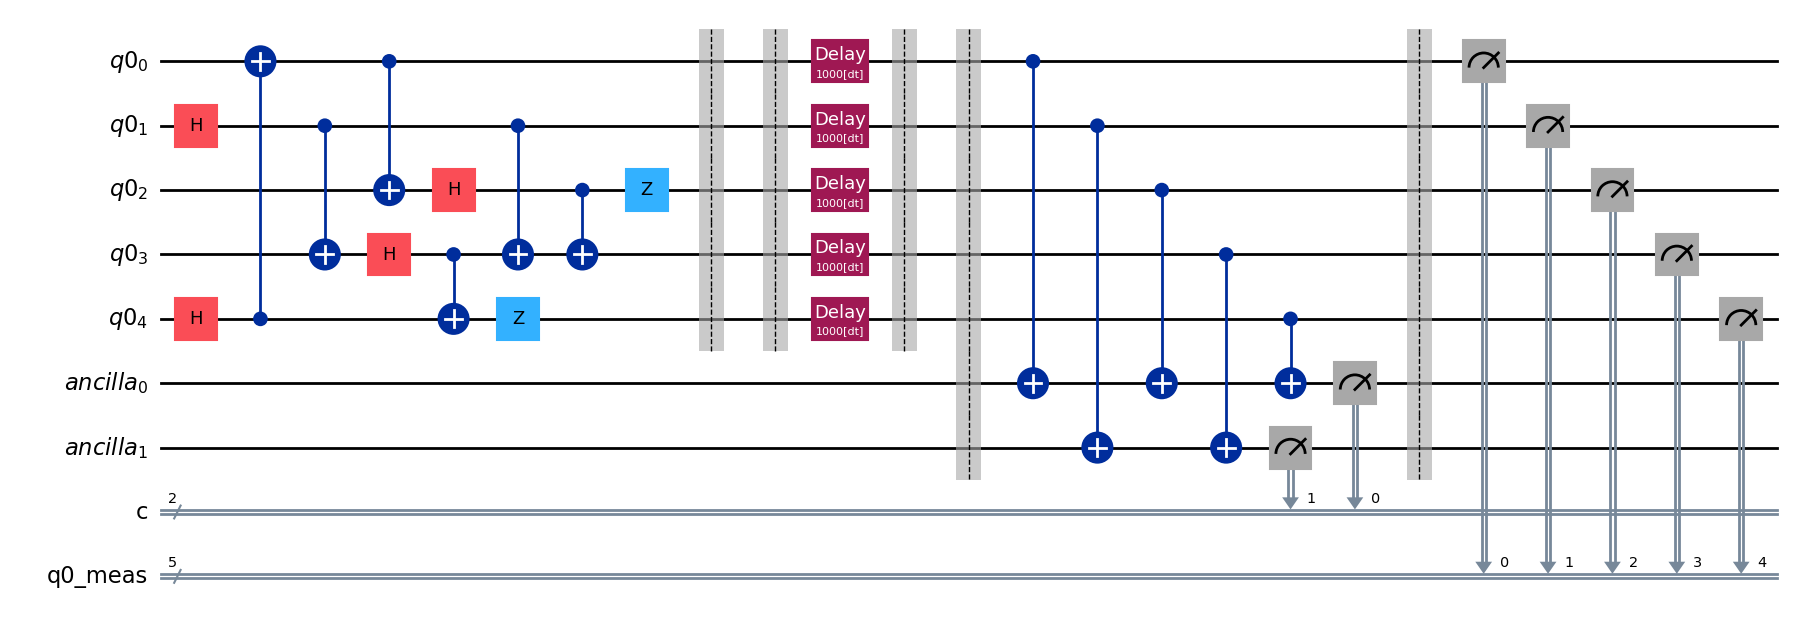

In [11]:


def load_circuit(delay):
    qc = FiveQbStabilizerCodeCircuit(1)

    type = '0'
    qc.encode(type=type)
    
    qc.delay(delay)

    pc = qc.physical_circuit

    pc.add_register(QuantumRegister(2, 'ancilla'))
    pc.barrier()

    pc.cx(0, 5)
    pc.cx(1, 6)
    pc.cx(2, 5)
    pc.cx(3, 6)
    pc.cx(4, 5)

    pc.add_register(ClassicalRegister(2, 'c'))
    pc.measure([5, 6], [0, 1])

    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [9]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_kyiv")

In [10]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 13
Transpiled Circuit Depth: 58


In [12]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [13]:
# t_array = [t*2_000 for t in range(0, 6)] # brisbane
t_array = [t*4_500 for t in range(0, 6)] # kyiv
print([round(t*dt * 10**(-3), 3) for t in t_array])


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [14]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=20,
                                initial_layout = [60, 53, 61, 59, 41, 42, 43]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=7))
    # c.draw(output='mpl')

Circuit Depth: 56
Delay Duration: 0.0 us
Total Duration: 11.769 us

[60, 53, 61, 59, 41, 42, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 58
Delay Duration: 1.0 us
Total Duration: 12.772 us

[41, 53, 42, 40, 60, 61, 59]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 58
Delay Duration: 2.0 us
Total Duration: 13.771 us

[41, 53, 42, 40, 60, 61, 59]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 58
Delay Duration: 3.0 us
Total Duration: 14.77 us

[60, 53, 61, 59, 41, 42, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 57
Delay Duration: 4.0 us
Total Duration: 15.769 us

[60, 53, 61, 59, 41, 42, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 58
Delay Duration: 5.0 us
Total Duration: 16.772 us

[60, 53, 61, 59, 41, 42, 43]


C:\Users\marzu\AppData\Local\Temp\ipykernel_53508\3625102499.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [15]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)
reg = 'c'
print(f" {reg}: {simulation_result.data[reg].get_counts()}")


 c: {'11': 1628, '00': 1572}


In [18]:
test_qc = FiveQbStabilizerCodeCircuit(1)

test_qc.encode(type='0')

pc = test_qc.physical_circuit
pc.add_register(QuantumRegister(2, 'ancilla'))

pc.cx(0, 5)
pc.cx(1, 6)
pc.cx(2, 5)
pc.cx(3, 6)
pc.cx(4, 5)


statevector = statevector_simulation(test_qc.physical_circuit, qb_len=7)

anc_count = {
    '00': 0,
    '01': 0,
    '10': 0,
    '11': 0
}
for s in statevector:
    anc_count[s[-2:]] += np.abs(statevector[s])**2

print(*[f"{s}: {round(anc_count[s],2)}" for s in anc_count], sep='\n')


00: 0.5
01: 0
10: 0
11: 0.5


In [20]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
job = service.job('cym00q2cw2k00089thsg') # kyiv, shots = 3200, t_array = [t*4_500 for t in range(0, 6)]


pub_result = job.result()


In [37]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]
anc_states = ['00', '11', '01', '10']

results = []
ancilla_results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    meas = result['__value__']['data']['c'].get_counts()
    anc = {}
    for k in anc_states:
        k_inv = k[::-1]
        anc[k] = meas[k_inv] if k_inv in meas else 0
        anc[k] = anc[k] / shots * 100 # %
    ancilla_results.append(anc)

    count = {}

    count['0'] = anc['00'] + anc['11']
    count['1'] = anc['01'] + anc['10']

    logical_meas_results.append(count)



In [39]:

delays = [round(t*dt/1000) for t in t_array]


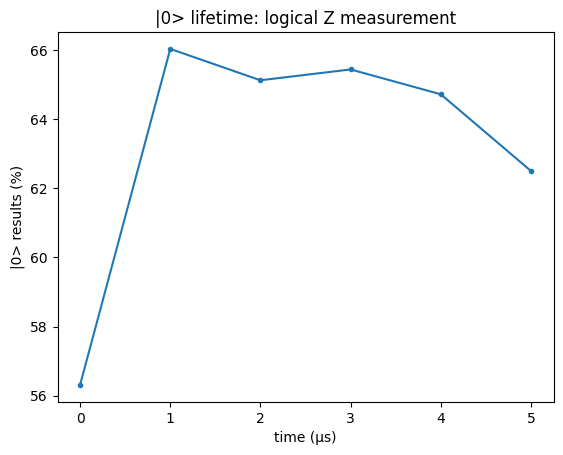

In [80]:
import matplotlib.pyplot as plt

x = delays

y = [logical_meas_results[i]['0'] for i in range(len(x))]

plt.plot(x, y, '.-')

plt.xlabel('time (μs)')
plt.ylabel('|0> results (%)')
plt.title('|0> lifetime: logical Z measurement')

plt.show()

In [55]:
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in anc_states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(ancilla_results[i][s]*shots/100) for s in anc_states], sep='\t ')

 delay (μs)	 00	 11	 01	 10
----------------------------------------------------------------------------------
 0		 829	 973	 776	 622
 1		 1035	 1078	 555	 532
 2		 1042	 1042	 557	 559
 3		 1076	 1018	 550	 556
 4		 1042	 1029	 556	 573
 5		 1067	 933	 589	 611


TVD (ancilla results)

In [38]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {round(logical_meas_results[i]['1'], 2)}%")

{'0': 56.3125, '1': 43.6875}
TVD: 43.69%
{'0': 66.03125, '1': 33.96875}
TVD: 33.97%
{'0': 65.125, '1': 34.875}
TVD: 34.88%
{'0': 65.4375, '1': 34.5625}
TVD: 34.56%
{'0': 64.71875, '1': 35.28125}
TVD: 35.28%
{'0': 62.5, '1': 37.5}
TVD: 37.5%


In [73]:
valid_states = ['00', '11']

In [74]:
alpha = {}

for s in anc_states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


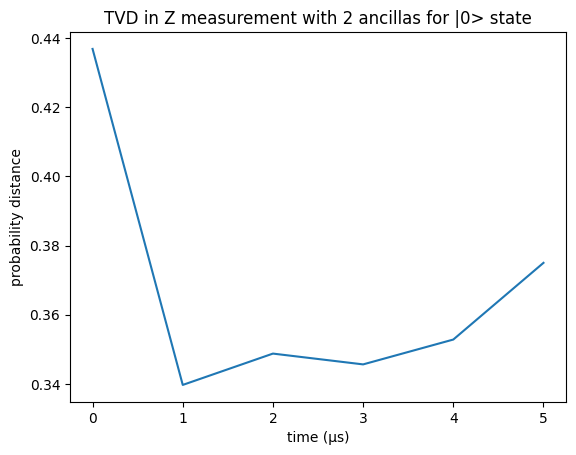

In [77]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in anc_states])/2 for r in ancilla_results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in Z measurement with 2 ancillas for |0> state')

# Display the plot
plt.show()

In [76]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 33.97%
